In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
heart = pd.read_csv("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/heart.csv",
                   index_col=0)

In [3]:
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
heart.Chol.head()

1    233
2    286
3    229
4    250
5    204
Name: Chol, dtype: int64

In [5]:
heart.MaxHR.head()

1    150
2    108
3    129
4    187
5    172
Name: MaxHR, dtype: int64

In [6]:
heart1 = pd.concat([heart.Chol, heart.MaxHR], axis=1)

In [7]:
heart1.head()

,Chol,MaxHR
1,233,150
2,286,108
3,229,129
4,250,187
5,204,172


In [8]:
heart.Chol.corr(heart.MaxHR)

-0.003431831518025789

In [9]:
heart1.corr()

,Chol,MaxHR
Chol,1.000000,-0.003432
MaxHR,-0.003432,1.000000


In [10]:
heart1.describe()

,Chol,MaxHR
count,303.000000,303.000000
mean,246.693069,149.607261
std,51.776918,22.875003
min,126.000000,71.000000
25%,211.000000,133.500000
50%,241.000000,153.000000
75%,275.000000,166.000000
max,564.000000,202.000000


In [11]:
Cholminusmean = heart.Chol - heart.Chol.mean()

In [12]:
MaxHRminusmean = heart.MaxHR - heart.MaxHR.mean()

In [13]:
xy = Cholminusmean * MaxHRminusmean

In [14]:
Sxy = xy.sum()
Sxy

-1227.5247524752485

In [15]:
xx = Cholminusmean ** 2

In [16]:
Sxx = xx.sum()
Sxx

809616.4554455446

In [17]:
beta1 = Sxy / Sxx
beta1

-0.0015161805867689813

In [18]:
beta0 = heart.MaxHR.mean() - beta1 * heart.Chol.mean()
beta0

149.98129196864625

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

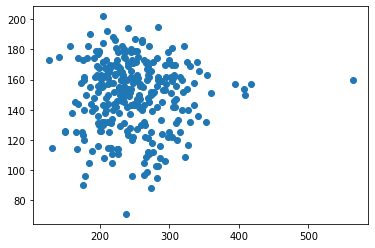

In [20]:
plt.scatter('Chol', 'MaxHR', data=heart)

In [21]:
heart.Chol.min()

126

In [22]:
heart.Chol.max()

564

In [24]:
x = np.arange(heart.Chol.min(), heart.Chol.max())

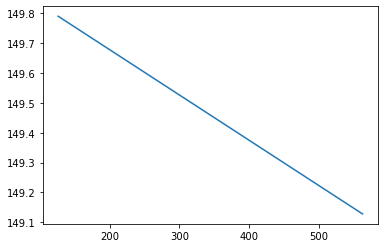

In [25]:
plt.plot(x, beta0 + beta1 * x)

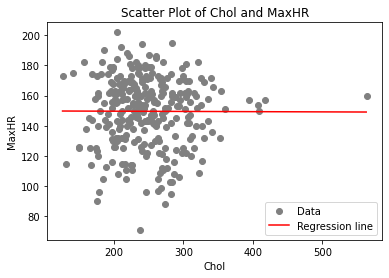

In [26]:
plt.scatter('Chol', 'MaxHR', data=heart, color='grey', label='Data')
plt.plot(x, beta0 + beta1 * x, color='red', label = 'Regression line')
plt.title('Scatter Plot of Chol and MaxHR', fontsize=12)
plt.xlabel('Chol', fontsize=10)
plt.ylabel('MaxHR', fontsize=10)
plt.legend(loc='lower right')